In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from datetime import timedelta

import numpy as np
import yfinance as yf

from optfolio.optimize import Optimizer

In [3]:
PERIOD = '6y'
TICKERS = [
    # Internet services
    'msft', 'goog', 'fb', 'orcl', 'twtr', 'vmw',
    # Application software
    'adbe', 'crm', 'wday', 'sap', 'shop',
    # Comm. equipment
    'csco',
    # Semiconductors
    'intc', 'amd', 'txn', 'qcom', 'nvda',
    # Misc
    'dell',
    # Personal finance
    'v', 'ma', 'pypl',
    # Consumer directionary
    'aapl', 'nke', 'sne', 'amzn', 'ebay',
    # Aerospace
    'lmt', 'noc',
    # Media
    'nflx', 'dis',
    # Airlines
    'dal', 'ual', 'luv',
    # Automotive
    'tsla'
]

data = yf.download(
    tickers=TICKERS,
    period=PERIOD,
    interval='1d',
    auto_adjust=True,
    prepost=False,
    groupby='ticker'
).dropna(axis=1, how='all')

daily_returns = (data['Close'] / data['Close'].shift(1) - 1)[1:]
daily_returns.head()

[*********************100%***********************]  34 of 34 downloaded


,AAPL,ADBE,AMD,AMZN,CRM,CSCO,DAL,DELL,DIS,EBAY,...,SAP,SHOP,SNE,TSLA,TWTR,TXN,UAL,V,VMW,WDAY
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-14,0.019893,0.030205,0.041162,0.016778,0.023128,0.009793,0.035252,NaN,0.016165,0.008264,...,-0.002811,NaN,-0.001179,0.157385,0.006745,0.026046,0.048206,0.017089,0.039990,0.038803
2014-01-15,0.020074,0.021700,0.039535,-0.004201,0.038428,0.016703,-0.015983,NaN,-0.002335,0.015483,...,0.002685,NaN,-0.007084,0.017734,0.057722,0.004591,-0.005348,0.005021,0.016551,-0.004929
2014-01-16,-0.005583,-0.000811,-0.020134,-0.000177,-0.008540,0.000000,0.002472,NaN,-0.000878,-0.000897,...,-0.002410,NaN,-0.011296,0.041674,-0.016242,-0.004032,0.015269,-0.009032,0.010160,0.034786
2014-01-17,-0.024421,-0.004219,-0.045662,0.009626,0.010978,-0.001590,-0.016203,NaN,-0.003075,-0.009874,...,-0.005905,NaN,-0.009621,-0.005615,0.026911,0.001889,-0.002965,0.046927,-0.011391,-0.016170
2014-01-21,0.015537,-0.008473,-0.002392,0.018618,0.018209,0.003715,0.032581,NaN,0.002937,0.017679,...,-0.011071,NaN,-0.011536,0.039233,0.005305,0.009429,0.017846,-0.000926,-0.008581,0.007245


In [4]:
YEAR_BARS = 252
TEST_YEARS = 1
TRAIN_END_DATE = data.index.max() - timedelta(days=TEST_YEARS * 365)
train = daily_returns[(daily_returns.index < TRAIN_END_DATE)].fillna(0)
test = daily_returns[(daily_returns.index >= TRAIN_END_DATE)].fillna(0)
print(np.any(np.isnan(train)))
print(train.shape)
train.head()

False
(1256, 34)


,AAPL,ADBE,AMD,AMZN,CRM,CSCO,DAL,DELL,DIS,EBAY,...,SAP,SHOP,SNE,TSLA,TWTR,TXN,UAL,V,VMW,WDAY
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-14,0.019893,0.030205,0.041162,0.016778,0.023128,0.009793,0.035252,0.0,0.016165,0.008264,...,-0.002811,0.0,-0.001179,0.157385,0.006745,0.026046,0.048206,0.017089,0.039990,0.038803
2014-01-15,0.020074,0.021700,0.039535,-0.004201,0.038428,0.016703,-0.015983,0.0,-0.002335,0.015483,...,0.002685,0.0,-0.007084,0.017734,0.057722,0.004591,-0.005348,0.005021,0.016551,-0.004929
2014-01-16,-0.005583,-0.000811,-0.020134,-0.000177,-0.008540,0.000000,0.002472,0.0,-0.000878,-0.000897,...,-0.002410,0.0,-0.011296,0.041674,-0.016242,-0.004032,0.015269,-0.009032,0.010160,0.034786
2014-01-17,-0.024421,-0.004219,-0.045662,0.009626,0.010978,-0.001590,-0.016203,0.0,-0.003075,-0.009874,...,-0.005905,0.0,-0.009621,-0.005615,0.026911,0.001889,-0.002965,0.046927,-0.011391,-0.016170
2014-01-21,0.015537,-0.008473,-0.002392,0.018618,0.018209,0.003715,0.032581,0.0,0.002937,0.017679,...,-0.011071,0.0,-0.011536,0.039233,0.005305,0.009429,0.017846,-0.000926,-0.008581,0.007245


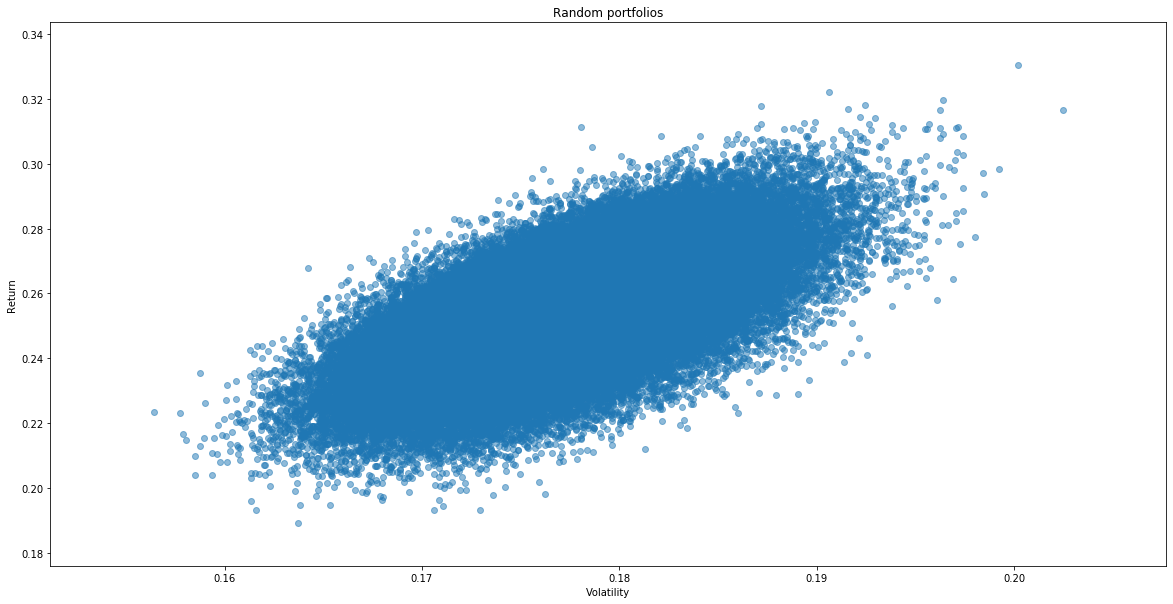

In [5]:
def random_population(n_assets, population_size):
    weights = np.random.uniform(0, 1, size=(population_size, n_assets))

    return weights / weights.sum(axis=-1).reshape((-1, 1))

def annualized_portfolio_return(returns, weights):
    weighted_returns = np.matmul(weights, np.mean(returns.values, 0))

    return (weighted_returns + 1) ** YEAR_BARS - 1


def annualized_portfolio_volatility(returns, weights):
    variance = np.sum(weights * np.matmul(weights, np.cov(returns.T.values)), -1)

    return np.sqrt(variance) * np.sqrt(YEAR_BARS)
    

def annualized_portfolio_performance(returns, weights):
    return np.stack([
        annualized_portfolio_return(returns, weights),
        annualized_portfolio_volatility(returns, weights)
    ], -1)

rand_weights = random_population(train.shape[1], 100000)
rand_solutions = annualized_portfolio_performance(train, rand_weights)

plt.figure(figsize=(20,10))
plt.title('Random portfolios')
plt.scatter(rand_solutions[:,1], rand_solutions[:,0], alpha=.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [6]:
optimizer = Optimizer(mutation_sigma=.5, verbose=False)
solutions, stats = optimizer.run(train.values)

In [7]:
solutions.shape

(88, 34)

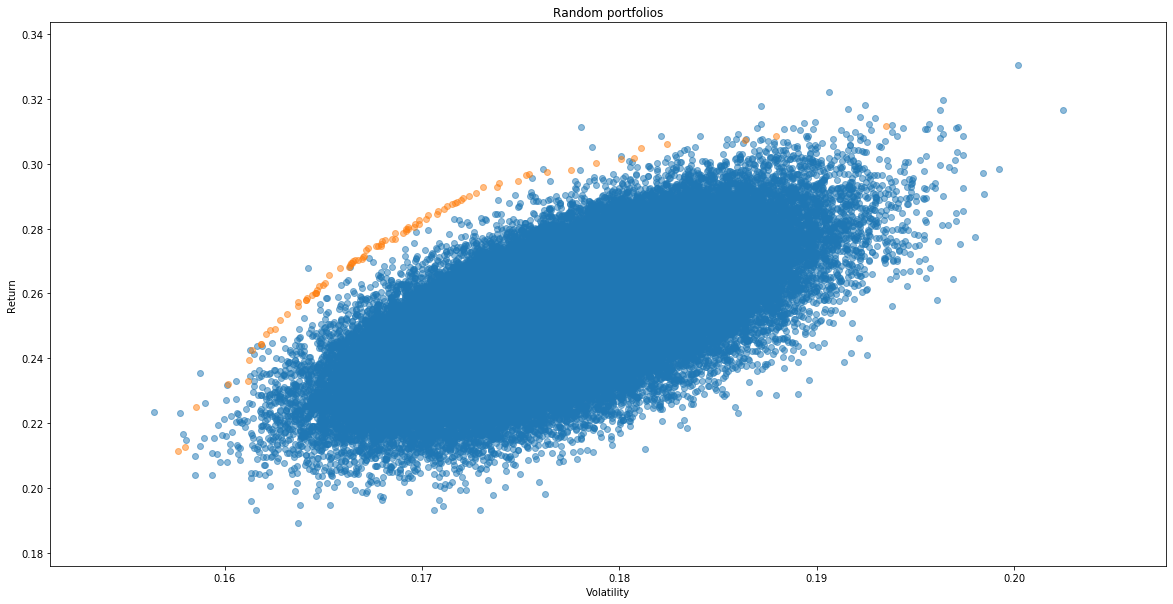

In [8]:
ov = annualized_portfolio_performance(train, solutions)
plt.figure(figsize=(20,10))
plt.title('Random portfolios')
plt.scatter(rand_solutions[:,1], rand_solutions[:,0], alpha=.5)
plt.scatter(ov[:,1], ov[:,0], alpha=.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [9]:
sharpe = ov[:,0] / ov[:,1]
solution = solutions[np.argmax(sharpe)]

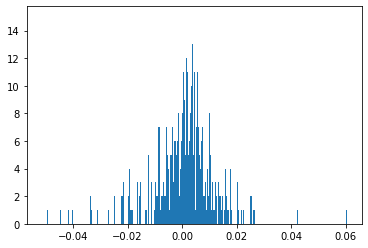

In [12]:
ret = np.dot(train, solution)
plt.hist(ret, bins=1000)
plt.show()

In [13]:
from optfolio.returns_projection import cumulative_n_period_returns, sample_returns, mcmc_sample_returns

In [14]:
traces = sample_returns(ret, 5 * 252, n_traces = 100000)

In [15]:
mcmc_traces = mcmc_sample_returns(ret, 5 * 252, n_traces=10000, n_jobs=10)

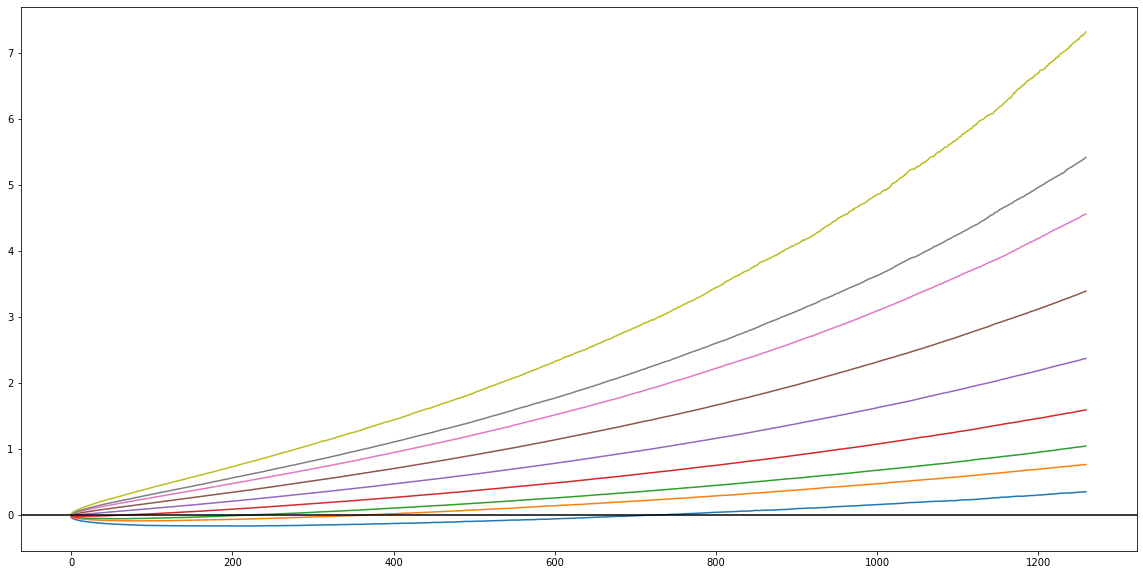

In [20]:
cum_traces = np.cumprod(traces + 1, axis=-1) - 1
q = np.quantile(cum_traces, q=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99], axis=0)

plt.figure(figsize=(20,10))
for v in q:
    plt.plot(v)
plt.axhline(0, color='black')
plt.show()

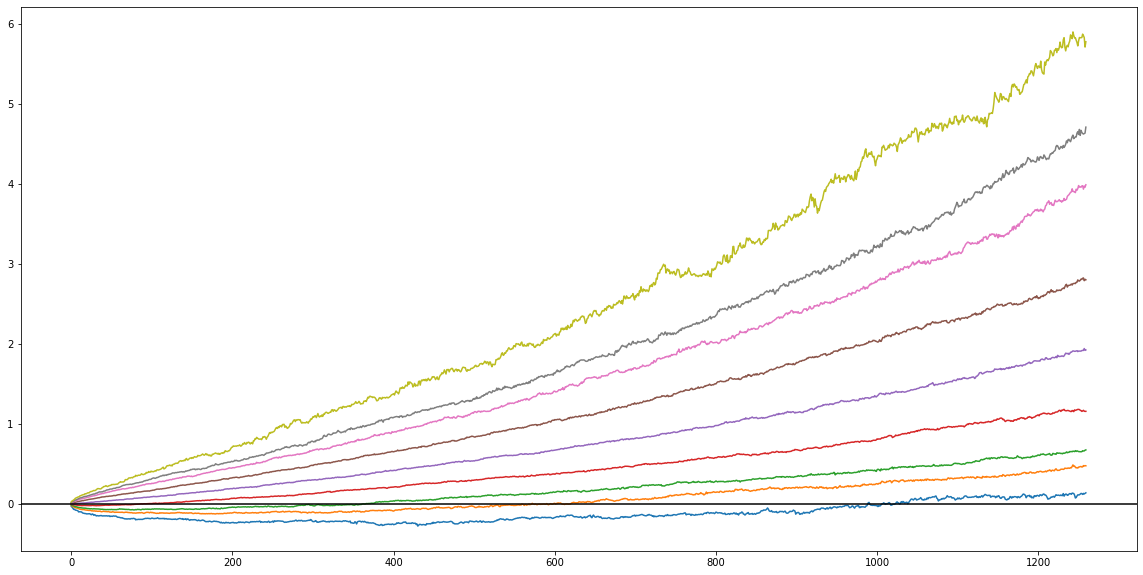

In [21]:
cum_traces = np.cumprod(mcmc_traces + 1, axis=-1) - 1
q = np.quantile(cum_traces, q=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99], axis=0)

plt.figure(figsize=(20,10))
for v in q:
    plt.plot(v)
plt.axhline(0, color='black')
plt.show()